<a href="https://colab.research.google.com/github/pincesslucy/PECVD_OES/blob/main/oes_DL0323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from keras.optimizers import Adam
from tensorflow import keras

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
base_path = "/content/drive/MyDrive/Colab Notebooks/data/oes/"
data = pd.read_csv(base_path + "oes.csv")

In [ ]:
data = data.drop(columns='Time(sec)')

In [ ]:
X = data.drop(columns='777.295')
y = data['777.295']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
input_shape = X_train.shape[1]
input_shape

3647

##모델1

In [ ]:
def build_model(shape=[input_shape], n_neurons=30, n_hidden=1, learning_rate=3e-3):
  input_ = keras.layers.Input(shape=[input_shape])
  hidden = []
  for i in range(n_hidden):
    if i == 0:
      hidden.append(keras.layers.Dense(n_neurons, activation='relu')(input_))
    else:
      hidden.append(keras.layers.Dense(n_neurons, activation='relu')(hidden[i-1]))
  concat = keras.layers.Concatenate()([input_, hidden[n_hidden-1]])
  output = keras.layers.Dense(1, activation='linear')(concat)
  model = keras.Model(inputs=[input_], outputs=[output])
  model.compile(optimizer=Adam(), loss='mse')
  return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-51-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [ ]:
#10에포크동안 진전없으면 최상 성능 저장후 훈련종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
#최상 성능 저장 후 훈련종료
#checkpoint_cb = keras.callbacks.ModelCheckpoint('oes_cp.h5', save_best_only=True)

In [ ]:
keras_reg.fit(X_train, y_train, batch_size=256, epochs=50000, validation_split=0.1, callbacks=[early_stopping_cb])

In [ ]:
#파라미터 튜닝
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden' : [0,1,2,3],
    'n_neurons' : np.arange(32,256),
    'learning_rate' : reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[early_stopping_cb])

Epoch 1/100
14/14 [==============================] - 1s 15ms/step - loss: 8967772.0000 - val_loss: 8721460.0000
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 8169610.0000 - val_loss: 6738328.5000
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 4267594.5000 - val_loss: 681516.7500
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 515268.4062 - val_loss: 229302.9375
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 211614.8750 - val_loss: 225756.2812
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 140496.0000 - val_loss: 132500.1406
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 114164.8594 - val_loss: 119672.9141
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 103274.9219 - val_loss: 105241.1953
Epoch 9/100
14/14 [==============================] - 0s 6ms/step - loss: 96047.5547 - val_loss: 101782.9609
Epoch 10/100
1

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-50-d1906d050658>", line 9, in build_model
    concat = keras.layers.Concatenate()([input_, hidden[n_hidden-1]])
IndexError: list 

20/20 [==============================] - 0s 10ms/step - loss: 8774181.0000 - val_loss: 8373831.5000
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 7602391.5000 - val_loss: 6598972.5000
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 5296639.5000 - val_loss: 3704533.0000
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 2390263.7500 - val_loss: 1119688.6250
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 585251.1250 - val_loss: 187050.2969
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 130826.3594 - val_loss: 106790.2500
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 113462.5625 - val_loss: 102784.4922
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 106764.1562 - val_loss: 98812.2578
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 103145.3203 - val_loss: 96147.6094
Epoch 10/100
20/20 [====

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fea49f26760>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fea49ba6f40>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,...
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 255])})

In [ ]:
print('best param:', rnd_search_cv.best_params_)
print('best score:', rnd_search_cv.best_score_)

best param: {'learning_rate': 0.00036074432992933795, 'n_hidden': 1, 'n_neurons': 213}
best score: -63434.503255208336


In [ ]:
model = rnd_search_cv.best_estimator_.model

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 67150.2656


67150.265625

In [ ]:
#history = model.fit(X_train, y_train, batch_size=256, epochs=50000, validation_split=0.1, callbacks=[early_stopping_cb])

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test accuracy:', test_loss)

6/6 [==============================] - 0s 10ms/step - loss: 61355.6680
Test accuracy: 61355.66796875


<function matplotlib.pyplot.show(close=None, block=None)>

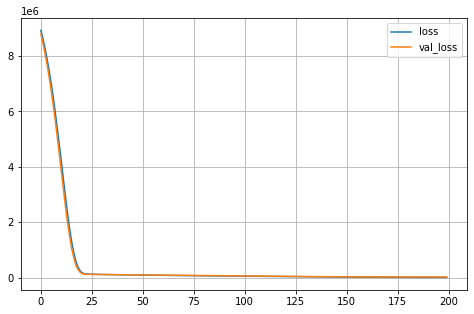

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show

In [ ]:
result = model.predict(X_test)
result

6/6 [==============================] - 0s 3ms/step


array([[2824.4832],
       [2818.084 ],
       [2964.2412],
       [2822.4763],
       [3282.34  ],
       [2812.6917],
       [2823.313 ],
       [2808.3394],
       [2864.6545],
       [2823.3184],
       [2815.2378],
       [2817.9282],
       [3287.3577],
       [2812.0352],
       [2808.5264],
       [3273.6077],
       [2816.6553],
       [3284.8674],
       [3255.073 ],
       [2814.1523],
       [2808.594 ],
       [3267.3857],
       [3274.2234],
       [2816.9785],
       [2812.8926],
       [3274.5144],
       [2812.108 ],
       [2814.6138],
       [3259.2454],
       [2809.9346],
       [2822.6711],
       [2815.7927],
       [2824.9082],
       [2822.5212],
       [3272.6077],
       [2811.4824],
       [2814.38  ],
       [2812.702 ],
       [2818.9536],
       [2832.8323],
       [3266.1885],
       [3268.0562],
       [2821.0366],
       [2813.0469],
       [3243.2605],
       [3280.3296],
       [2817.5684],
       [2827.3252],
       [3243.4312],
       [2810.7659],


In [ ]:
result_df = pd.DataFrame(result)

In [ ]:
y_df = pd.DataFrame(y_test)

In [ ]:
y_df.reset_index(drop=True, inplace=True)

In [ ]:
fianl = pd.concat([result_df, y_df], axis=1)

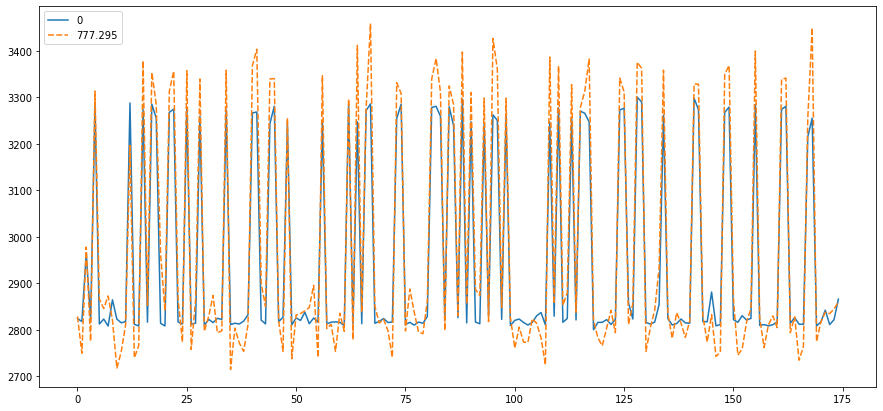

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=fianl, legend=True)
plt.savefig("oxygen_pred_DL.png")

##모델2

In [ ]:
input_ = keras.layers.Input(shape=[input_shape])
dropout_layer1 = keras.layers.Dropout(rate=0.2)(input_)
hidden1 = keras.layers.Dense(512, activation='selu', kernel_initializer='lecun_normal')(dropout_layer1)
dropout_layer2 = keras.layers.Dropout(rate=0.2)(hidden1)
hidden2 = keras.layers.Dense(512, activation='selu', kernel_initializer='lecun_normal')(dropout_layer2)
dropout_layer3 = keras.layers.Dropout(rate=0.2)(hidden2)
hidden3 = keras.layers.Dense(512, activation='selu', kernel_initializer='lecun_normal')(dropout_layer3)
dropout_layer4 = keras.layers.Dropout(rate=0.2)(hidden3)
hidden4 = keras.layers.Dense(512, activation='selu', kernel_initializer='lecun_normal')(dropout_layer4)
dropout_layer5 = keras.layers.Dropout(rate=0.2)(hidden4)
hidden5 = keras.layers.Dense(512, activation='selu', kernel_initializer='lecun_normal')(dropout_layer5)
dropout_layer6 = keras.layers.Dropout(rate=0.2)(hidden5)
hidden6 = keras.layers.Dense(512, activation='selu', kernel_initializer='lecun_normal')(dropout_layer6)
dropout_layer7 = keras.layers.Dropout(rate=0.2)(hidden6)
hidden7 = keras.layers.Dense(512, activation='selu', kernel_initializer='lecun_normal')(dropout_layer7)
dropout_layer8 = keras.layers.Dropout(rate=0.2)(hidden7)
hidden8 = keras.layers.Dense(512, activation='selu', kernel_initializer='lecun_normal')(dropout_layer8)
dropout_layer9 = keras.layers.Dropout(rate=0.2)(hidden8)
hidden9 = keras.layers.Dense(512, activation='selu', kernel_initializer='lecun_normal')(dropout_layer9)
dropout_layer10 = keras.layers.Dropout(rate=0.2)(hidden9)
output = keras.layers.Dense(1, activation='linear')(dropout_layer10)
model = keras.Model(inputs=[input_], outputs=[output])
model.compile(optimizer=keras.optimizers.Nadam(), loss='mse')
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 3647)]            0         
                                                                 
 dropout_71 (Dropout)        (None, 3647)              0         
                                                                 
 dense_71 (Dense)            (None, 512)               1867776   
                                                                 
 dropout_72 (Dropout)        (None, 512)               0         
                                                                 
 dense_72 (Dense)            (None, 512)               262656    
                                                                 
 dropout_73 (Dropout)        (None, 512)               0         
                                                                 
 dense_73 (Dense)            (None, 512)               262

In [ ]:
#10에포크동안 진전없으면 최상 성능 저장후 훈련종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=256, epochs=50000, validation_split=0.1, callbacks=[early_stopping_cb])

Epoch 1/50000
3/3 [==============================] - 6s 124ms/step - loss: 8969160.0000 - val_loss: 8024149.0000
Epoch 2/50000
3/3 [==============================] - 0s 42ms/step - loss: 6523160.5000 - val_loss: 4651483.0000
Epoch 3/50000
3/3 [==============================] - 0s 31ms/step - loss: 3920101.2500 - val_loss: 1699711.7500
Epoch 4/50000
3/3 [==============================] - 0s 31ms/step - loss: 1104317.7500 - val_loss: 351332.7500
Epoch 5/50000
3/3 [==============================] - 0s 33ms/step - loss: 262015.2656 - val_loss: 76790.5938
Epoch 6/50000
3/3 [==============================] - 0s 28ms/step - loss: 185553.3594 - val_loss: 91767.2656
Epoch 7/50000
3/3 [==============================] - 0s 35ms/step - loss: 171403.5000 - val_loss: 76331.6719
Epoch 8/50000
3/3 [==============================] - 0s 32ms/step - loss: 166335.8125 - val_loss: 74671.8750
Epoch 9/50000
3/3 [==============================] - 0s 32ms/step - loss: 154875.3594 - val_loss: 53049.5039
Epoch 1

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 4391.2324


4391.232421875

<function matplotlib.pyplot.show(close=None, block=None)>

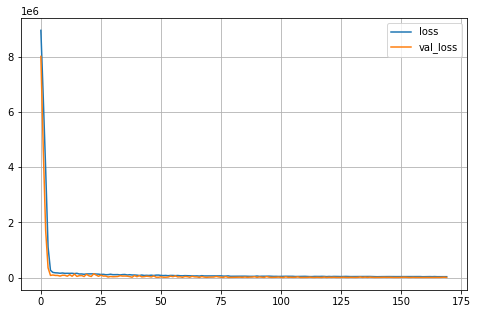

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show